In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from src.compile_results import compile_results

In [2]:
logic_df = pd.read_csv("response_evaluation/LogicAllTableExport.csv", index_col=0)
math_df = pd.read_csv("response_evaluation/MathAllTableExport.csv", index_col=0)

NameError: name 'df' is not defined

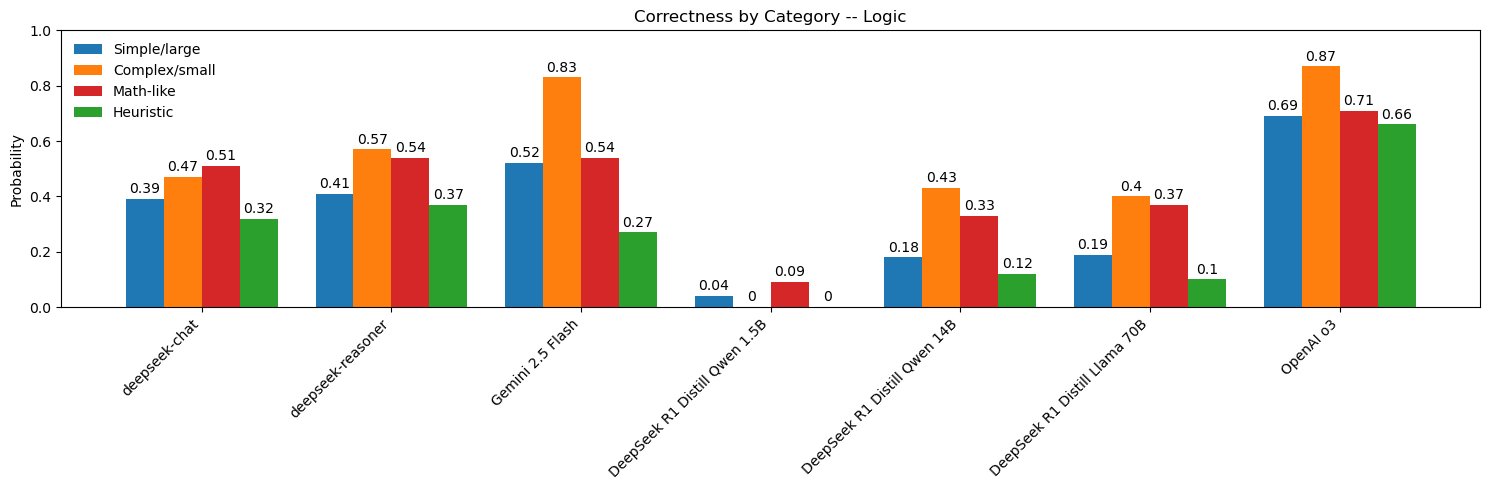

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# — your setup —
full_models = [
    'DSChat+mathPrompt', 'DSReason+mathPrompt', 'GeminiFlash+mathPrompt',
    'Qwen1+mathPrompt', 'Qwen14+mathPrompt', 'Qwen70+mathPrompt',
    'GPT-o3+mathPrompt'
]
label_dict = {
    'DSChat+mathPrompt':     'deepseek-chat',
    'DSReason+mathPrompt':   'deepseek-reasoner',
    'GeminiFlash+mathPrompt':'Gemini 2.5 Flash',
    'Qwen1+mathPrompt':      'DeepSeek R1 Distill Qwen 1.5B',
    'Qwen14+mathPrompt':     'DeepSeek R1 Distill Qwen 14B',
    'Qwen70+mathPrompt':     'DeepSeek R1 Distill Llama 70B',
    'GPT-o3+mathPrompt':     'OpenAI o3'
}
species    = [label_dict[m] for m in full_models]
categories = ['Simple/large', 'Complex/small', 'Math-like', 'Heuristic']

# load your dataframe
# logic_df = …

# build a dict of lists: one list per category
penguin_means = {
    cat: logic_df.loc[cat, full_models].round(2).tolist()
    for cat in categories
}

# define exactly the colors you want
color_map = {
    'Simple/large':   'tab:blue',
    'Complex/small':  'tab:orange',
    'Math-like':      'tab:red',    # ← swapped to red
    'Heuristic':      'tab:green'   # ← swapped to green
}

# — plotting parameters —
width        = 0.3
n_categories = len(categories)
group_width  = width * n_categories
gap          = width
step         = group_width + gap

x = np.arange(len(species)) * step

fig, ax = plt.subplots(figsize=(15, 5))

for i, cat in enumerate(categories):
    vals = penguin_means[cat]
    bars = ax.bar(
        x + i*width,
        vals,
        width,
        label=cat,
        color=color_map[cat]
    )
    ax.bar_label(bars, padding=2)

ax.set_xticks(x + group_width/2 - width/2)
ax.set_xticklabels(species, rotation=45, ha='right')

ax.set_ylabel('Probability')
ax.set_title('Correctness by Category -- Logic')

# move legend outside so it doesn’t cover bars
ax.legend(
    loc='upper left',

    frameon=False
)

ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


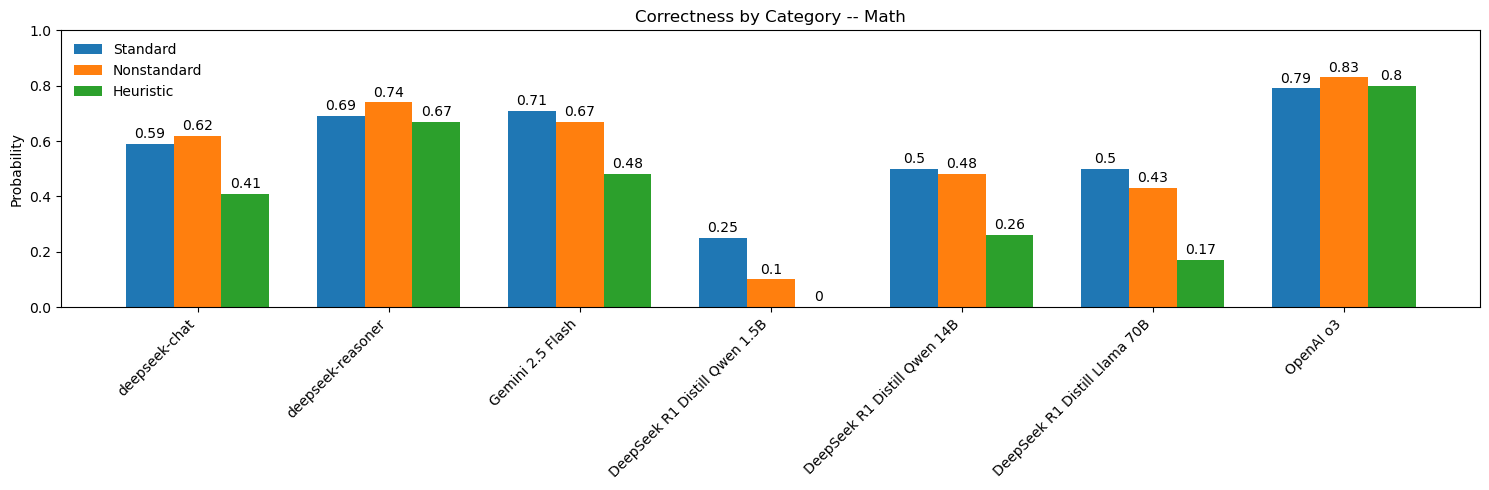

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

full_models = [
    'DSChat+mathPrompt', 'DSReason+mathPrompt', 'GeminiFlash+mathPrompt',
    'Qwen1+mathPrompt', 'Qwen14+mathPrompt', 'Qwen70+mathPrompt',
    'GPT-o3+mathPrompt'
]
species    = [label_dict[m] for m in full_models]
categories = ['Standard', 'Nonstandard', 'Heuristic']

# — load your counts dataframe (indexed by category) —


# build a dict of lists: one list per category
penguin_means = {
    cat: math_df.loc[cat, full_models].tolist()
    for cat in categories
}
for cat in categories:
    penguin_means[cat] = [round(penguin_means[cat][i], 2) for i in range(len(penguin_means[cat]))]

# — plotting parameters —
width       = 0.2                      # width of each bar
n_categories = len(categories)
group_width = width * n_categories     # total width of each bundle
gap          = width                   # extra space between bundles
step         = group_width + gap       # distance between bundle *anchors*

# x positions for each model’s bundle
x = np.arange(len(species)) * step

# make the figure wider so bundles are easy to see
fig, ax = plt.subplots(figsize=(15, 5))

# draw each category’s bars, offset by i*width
for i, cat in enumerate(categories):
    vals = penguin_means[cat]
    bars = ax.bar(x + i*width, vals, width, label=cat)
    ax.bar_label(bars, padding=2)

# center your x-tick labels under each bundle
ax.set_xticks(x +  group_width * 1/3)
ax.set_xticklabels(species, rotation=45, ha='right')

ax.set_ylabel('Probability')
ax.set_title('Correctness by Category -- Math')

# vertical legend
ax.legend(loc='upper left', ncol=1, frameon=False)

ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

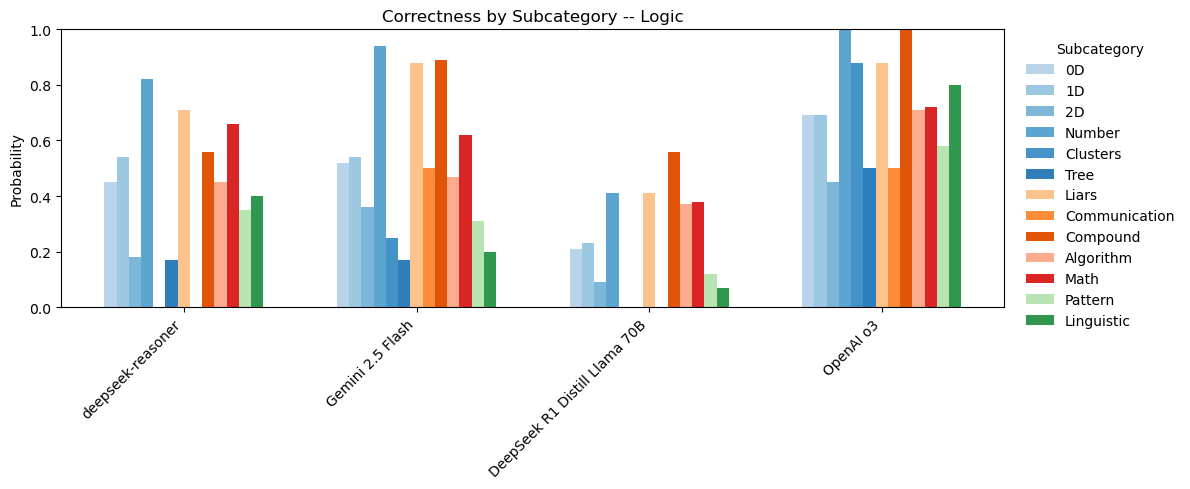

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# — your setup —
full_models = [
    'DSReason+mathPrompt', 'GeminiFlash+mathPrompt',
    'Qwen70+mathPrompt',
    'GPT-o3+mathPrompt'
]
label_dict = {
    'DSChat+mathPrompt':    'deepseek-chat',
    'DSReason+mathPrompt':  'deepseek-reasoner',
    'GeminiFlash+mathPrompt':'Gemini 2.5 Flash',
    'Qwen1+mathPrompt':     'DeepSeek R1 Distill Qwen 1.5B',
    'Qwen14+mathPrompt':    'DeepSeek R1 Distill Qwen 14B',
    'Qwen70+mathPrompt':    'DeepSeek R1 Distill Llama 70B',
    'GPT-o3+mathPrompt':    'OpenAI o3'
}

categories = ['Simple/large', 'Complex/small', 'Math-like', 'Heuristic']
subcat_map = {
    'Simple/large':  ['0D', '1D', '2D', 'Number', 'Clusters', 'Tree'],
    'Complex/small':['Liars', 'Communication', 'Compound'],
    'Math-like':    ['Algorithm', 'Math'],
    'Heuristic':    ['Pattern', 'Linguistic']
}

# reverse dict so we can find the “parent” main‐category for each sub‐cat
parent = { sub: cat for cat, subs in subcat_map.items() for sub in subs }

# pick one colormap per main category
cmap_for = {
    'Simple/large': plt.cm.Blues,
    'Complex/small': plt.cm.Oranges,
    'Math-like': plt.cm.Reds,
    'Heuristic': plt.cm.Greens
}

# build a color for each subcategory by sampling its parent colormap
subcat_colors = {}
for main_cat, subs in subcat_map.items():
    n = len(subs)
    cmap = cmap_for[main_cat]
    # sample evenly from 0.3→0.7 in that colormap
    if n>1:
        shades = np.linspace(0.3, 0.7, n)
    else:
        shades = [0.5]
    for sub, shade in zip(subs, shades):
        subcat_colors[sub] = cmap(shade)

# now pull out the models in the right order
species = [label_dict[m] for m in full_models]

# — load your counts dataframe (indexed by category) —
subcategories = [sub for cat in categories for sub in subcat_map[cat]]

penguin_means = {
    cat: logic_df.loc[cat, full_models].round(2).tolist()
    for cat in subcategories
}

# — plotting parameters —
width       = 0.2                    # width of each bar
n_categories = len(subcategories)
group_width = width * n_categories   # total width of each bundle
gap          = width * 6                # extra space between bundles
step         = group_width + gap     # distance between bundle *anchors*

# x positions for each model’s bundle
x = np.arange(len(species)) * step

fig, ax = plt.subplots(figsize=(12, 5))

# draw each subcategory’s bars, offset by i*width
for i, subcat in enumerate(subcategories):
    vals = penguin_means[subcat]
    bars = ax.bar(
        x + i*width,
        vals,
        width,
        label=subcat,
        color=subcat_colors[subcat]
    )
    # ax.bar_label(bars, padding=2)

# center your x‐tick labels under each bundle
ax.set_xticks(x + group_width/2 - width/2)
ax.set_xticklabels(species, rotation=45, ha='right')

ax.set_ylabel('Probability')
ax.set_title('Correctness by Subcategory -- Logic')

# put the legend outside
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.01, 1),
    title='Subcategory',
    frameon=False
)

ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


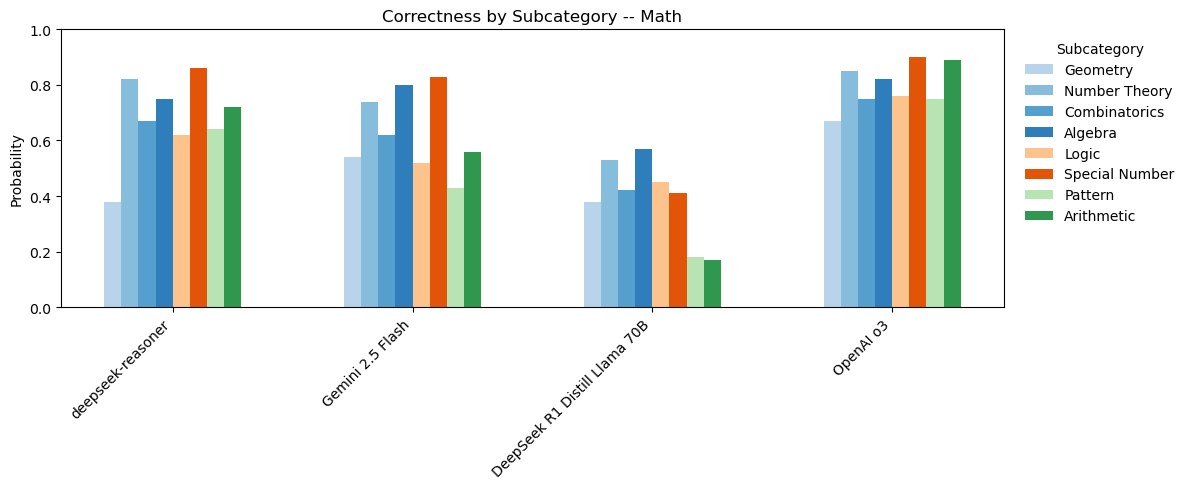

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# — your setup —
full_models = [
    'DSReason+mathPrompt', 'GeminiFlash+mathPrompt',
    'Qwen70+mathPrompt',
    'GPT-o3+mathPrompt'
]
label_dict = {
    'DSChat+mathPrompt':    'deepseek-chat',
    'DSReason+mathPrompt':  'deepseek-reasoner',
    'GeminiFlash+mathPrompt':'Gemini 2.5 Flash',
    'Qwen1+mathPrompt':     'DeepSeek R1 Distill Qwen 1.5B',
    'Qwen14+mathPrompt':    'DeepSeek R1 Distill Qwen 14B',
    'Qwen70+mathPrompt':    'DeepSeek R1 Distill Llama 70B',
    'GPT-o3+mathPrompt':    'OpenAI o3'
}

categories = ['Standard', 'Nonstandard', 'Heuristic']
subcat_map = {
    'Standard':  ['Geometry', 'Number Theory', 
'Combinatorics',
'Algebra'],
    'Nonstandard' :['Logic',
'Special Number'],
    'Heuristic':    ['Pattern', 'Arithmetic'],
}

# reverse dict so we can find the “parent” main‐category for each sub‐cat
parent = { sub: cat for cat, subs in subcat_map.items() for sub in subs }

# pick one colormap per main category
cmap_for = {
    'Standard': plt.cm.Blues,
    'Nonstandard': plt.cm.Oranges,
    'Heuristic': plt.cm.Greens
}

# build a color for each subcategory by sampling its parent colormap
subcat_colors = {}
for main_cat, subs in subcat_map.items():
    n = len(subs)
    cmap = cmap_for[main_cat]
    # sample evenly from 0.3→0.7 in that colormap
    if n>1:
        shades = np.linspace(0.3, 0.7, n)
    else:
        shades = [0.5]
    for sub, shade in zip(subs, shades):
        subcat_colors[sub] = cmap(shade)

# now pull out the models in the right order
species = [label_dict[m] for m in full_models]

# — load your counts dataframe (indexed by category) —
subcategories = [sub for cat in categories for sub in subcat_map[cat]]

penguin_means = {
    cat: math_df.loc[cat, full_models].round(2).tolist()
    for cat in subcategories
}

# — plotting parameters —
width       = 0.2                    # width of each bar
n_categories = len(subcategories)
group_width = width * n_categories   # total width of each bundle
gap          = width * 6                # extra space between bundles
step         = group_width + gap     # distance between bundle *anchors*

# x positions for each model’s bundle
x = np.arange(len(species)) * step

fig, ax = plt.subplots(figsize=(12, 5))

# draw each subcategory’s bars, offset by i*width
for i, subcat in enumerate(subcategories):
    vals = penguin_means[subcat]
    bars = ax.bar(
        x + i*width,
        vals,
        width,
        label=subcat,
        color=subcat_colors[subcat]
    )
    # ax.bar_label(bars, padding=2)

# center your x‐tick labels under each bundle
ax.set_xticks(x + group_width/2 - width/2)
ax.set_xticklabels(species, rotation=45, ha='right')

ax.set_ylabel('Probability')
ax.set_title('Correctness by Subcategory -- Math')

# put the legend outside
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.01, 1),
    title='Subcategory',
    frameon=False
)

ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()